In [2]:
import tensorflow as tf

# Sequential API

In [4]:
seq_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
seq_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


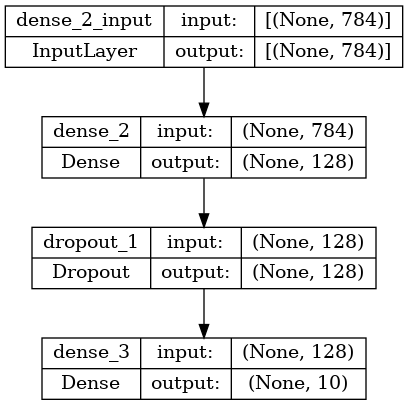

In [7]:
tf.keras.utils.plot_model(seq_model, 'sequential_model.png',  show_shapes=True)

# Functional API

In [8]:
input1 = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(128, activation='relu')(input1)
b1 = tf.keras.layers.Dense(64, activation='relu')(x)

input2 = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(128, activation='relu')(input2)
b2 = tf.keras.layers.Dense(64, activation='relu')(x)

add_1 = tf.keras.layers.add([b1, b2])
x = tf.keras.layers.Dense(32, activation='relu')(add_1)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

In [9]:
func_model = tf.keras.Model(inputs=[input1, input2], outputs=output)

In [10]:
func_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 128)                  100480    ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 128)                  100480    ['input_2[0][0]']             
                                                                                              

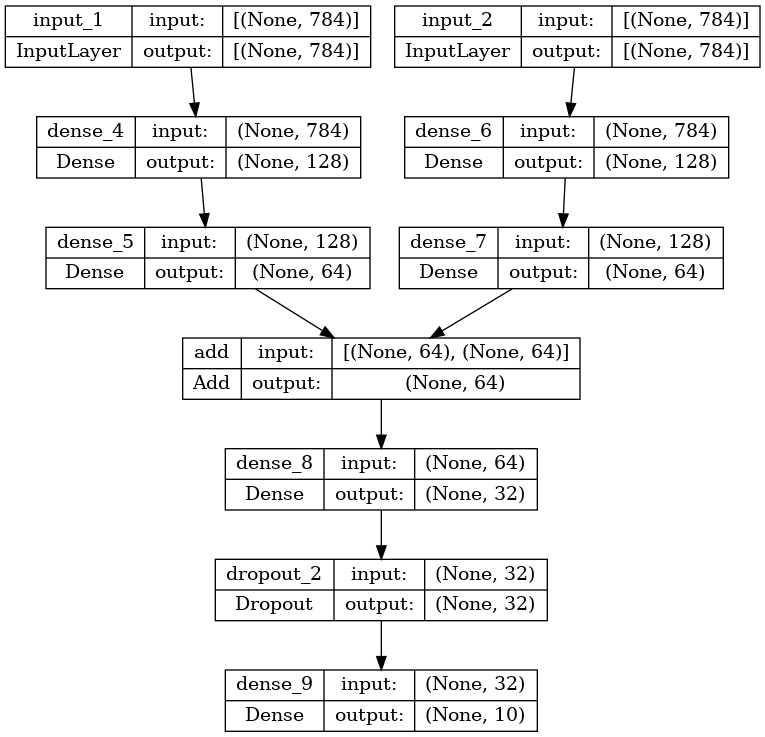

In [11]:
tf.keras.utils.plot_model(func_model, 'functional_model.png',  show_shapes=True)